In [1]:
experiment_name = '25similar'
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run init.py

Setting up variables & DB connection for experiment:

*******************
_exp3
*******************


/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)



Snorkel session connected to:  postgres:///snorkel_exp3


In [2]:
import seaborn as sns
from snorkel.annotations import save_marginals

In [3]:
from snorkel.lf_helpers import *
import pickle,glob

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [4]:
import pandas as pd
from MLutils import cohen_kappa_score, plot_marginals_histogram, neg_to_bin_labels

In [5]:
from MLutils import diversity_heatmap, merge_pickles_pred_dicts

In [6]:
# TODO move in LSTM training section

# needed to train the LSTM here
train = session.query(REGULATOR).filter(REGULATOR.split == 0).order_by(REGULATOR.id).all()
dev = session.query(REGULATOR).filter(REGULATOR.split == 1).order_by(REGULATOR.id).all()
test = session.query(REGULATOR).filter(REGULATOR.split == 2).order_by(REGULATOR.id).all()
unlab = session.query(REGULATOR).filter(REGULATOR.split == 3).order_by(REGULATOR.id).all()

In [7]:
from snorkel.annotations import LabelAnnotator

In [8]:
def signal_annotator(c):
    """A generator over the different (worker_id, label_id) pairs for a Tweet."""
    for model in results_dict.keys():
        try:
            yield model, results_dict[model]['label_unlab'][c.id]
            
        except:
            try:
                yield model, results_dict[model]['label_val'][c.id]
            except:
                yield model, results_dict[model]['label_test'][c.id]

labeler = LabelAnnotator(label_generator=signal_annotator)

# Retrieve results and pick models

In [9]:
import glob
from MLutils import diversity_matrix, reduce_results_dict, balance_candidates, sample_from_csr, majority_vote, majority_vote_score, average_vote, error_analysis
from utils import check_class_imbalance
from itertools import combinations
from snorkel.learning import RandomSearch, GenerativeModel, GridSearch
from snorkel.learning.structure import DependencySelector
from snorkel.learning import reRNN

from sklearn.metrics import accuracy_score, cohen_kappa_score

In [10]:
l = glob.glob(path_base_learners+"/KMeansPeaks/*.pickle")
l.sort()
l

['pickles/_exp3/base_learner_predictions/KMeansPeaks/10clusters.pickle',
 'pickles/_exp3/base_learner_predictions/KMeansPeaks/13clusters.pickle',
 'pickles/_exp3/base_learner_predictions/KMeansPeaks/15clusters.pickle',
 'pickles/_exp3/base_learner_predictions/KMeansPeaks/20clusters.pickle',
 'pickles/_exp3/base_learner_predictions/KMeansPeaks/21clusters.pickle',
 'pickles/_exp3/base_learner_predictions/KMeansPeaks/5clusters.pickle']

In [11]:
#initialize test scores (f1) dataframe
test_scores = pd.DataFrame(index=l)
test_scores['n_classif'] = list(map(lambda x: x.split('/')[-1] ,test_scores.index))

In [12]:
result_dict_file = l[0]



*******************


Loaded:
['results_dict,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_linear', 'results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_SVC_rbf_C=250', 'results_dict,ShortDepPath,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1)_RandomForestClassifier', 'results_dict,ShortDepPath,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_SVC_rbf_C=150', 'results_dict,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_LogisticRegression', 'results_dict,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=75', 'results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=75', 'results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=250', 'results_dict,trim=0,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=250', 'results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_RandomForestClassifier', 'results_dict,ShortDe

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[reRNN] Training model
[reRNN] n_train=5780  #epochs=25  batch size=64
[reRNN] Epoch 0 (22.12s)	Average loss=0.509086	Dev F1=43.71
[reRNN] Epoch 1 (48.01s)	Average loss=0.321396	Dev F1=42.49
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 2 (73.68s)	Average loss=0.247368	Dev F1=49.78
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 3 (98.89s)	Average loss=0.204002	Dev F1=49.84
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 4 (124.83s)	Average loss=0.166781	Dev F1=52.07
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 5 (150.66s)	Average loss=0.143485	Dev F1=50.18
[reRNN] Epoch 6 (176.06s)	Average loss=0.126024	Dev F1=54.19
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 7 (201.36s)	Average loss=0.102159	Dev F1=51.96
[reRNN] Epoch 8 (227.12s)	Average loss=0.090418	Dev F1=52.23
[reRNN] Epoch 9 (252.87s)	Average loss=0.079054	Dev F1=52.90
[reRNN] Epoch 10 (278.62s)	Average loss=0.070787	Dev F1=54.14
[reRNN] Epoch 11 (304.35s)	Average loss=0.078178	Dev F1=54.08
[reRNN] Epoch 12 (329.82s)	Average loss=0.07

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[reRNN] Training model
[reRNN] n_train=5624  #epochs=25  batch size=64
[reRNN] Epoch 0 (21.78s)	Average loss=0.525750	Dev F1=43.50
[reRNN] Epoch 1 (46.91s)	Average loss=0.343405	Dev F1=47.87
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 2 (72.16s)	Average loss=0.271101	Dev F1=49.33
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 3 (97.20s)	Average loss=0.224910	Dev F1=52.08
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 4 (122.38s)	Average loss=0.205262	Dev F1=52.74
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 5 (147.59s)	Average loss=0.183697	Dev F1=53.24
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 6 (172.77s)	Average loss=0.171228	Dev F1=53.23
[reRNN] Epoch 7 (197.38s)	Average loss=0.158358	Dev F1=53.32
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 8 (222.65s)	Average loss=0.141715	Dev F1=53.58
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 9 (247.81s)	Average loss=0.134856	Dev F1=52.48
[reRNN] Epoch 10 (272.78s)	Average loss=0.129851	Dev F1=52.69
[reRNN] Epoch 11 (297.84s)	Average loss=0.12

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[reRNN] Training model
[reRNN] n_train=5598  #epochs=25  batch size=64
[reRNN] Epoch 0 (22.11s)	Average loss=0.597607	Dev F1=42.06
[reRNN] Epoch 1 (47.66s)	Average loss=0.495006	Dev F1=43.10
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 2 (75.39s)	Average loss=0.468461	Dev F1=49.97
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 3 (101.07s)	Average loss=0.452806	Dev F1=50.66
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 4 (126.88s)	Average loss=0.442597	Dev F1=52.27
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 5 (152.41s)	Average loss=0.436470	Dev F1=54.59
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 6 (178.14s)	Average loss=0.432221	Dev F1=55.76
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 7 (203.55s)	Average loss=0.427697	Dev F1=55.78
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 8 (229.03s)	Average loss=0.424173	Dev F1=54.13
[reRNN] Epoch 9 (254.78s)	Average loss=0.421669	Dev F1=56.35
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 10 (282.36s)	Average loss=0.419766	Dev F1=57.40
[reRNN] Mode

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[reRNN] Training model
[reRNN] n_train=5598  #epochs=25  batch size=64
[reRNN] Epoch 0 (22.28s)	Average loss=0.488518	Dev F1=41.57
[reRNN] Epoch 1 (48.01s)	Average loss=0.269478	Dev F1=46.56
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 2 (73.52s)	Average loss=0.193178	Dev F1=52.36
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 3 (98.80s)	Average loss=0.144995	Dev F1=51.19
[reRNN] Epoch 4 (124.47s)	Average loss=0.117377	Dev F1=51.58
[reRNN] Epoch 5 (150.93s)	Average loss=0.090468	Dev F1=51.10
[reRNN] Epoch 6 (176.30s)	Average loss=0.090131	Dev F1=51.44
[reRNN] Epoch 7 (201.47s)	Average loss=0.084311	Dev F1=49.39
[reRNN] Epoch 8 (226.69s)	Average loss=0.058754	Dev F1=50.28
[reRNN] Epoch 9 (252.22s)	Average loss=0.045589	Dev F1=51.43
[reRNN] Epoch 10 (277.92s)	Average loss=0.041271	Dev F1=51.20
[reRNN] Epoch 11 (303.34s)	Average loss=0.044844	Dev F1=51.44
[reRNN] Epoch 12 (328.64s)	Average loss=0.051430	Dev F1=51.03
[reRNN] Epoch 13 (354.01s)	Average loss=0.041439	Dev F1=49.35
[reRNN] Epoch

Loaded:
['results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_SVC_rbf_C=250', 'results_dict,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_linear', 'results_dict,trim=0,lemmas,RuS,CV_,bin_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_SVC_rbf_C=150', 'results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=150', 'results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_linear', 'results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1)_SVC_rbf_C=150', 'results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=250', 'results_dict,trim=0,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=250', 'results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=250', 'results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_SVC_rbf_C=250', 'results_dict,ShortDepPath,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200_Logist

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[reRNN] Training model
[reRNN] n_train=5442  #epochs=25  batch size=64
[reRNN] Epoch 0 (20.94s)	Average loss=0.481858	Dev F1=48.86
[reRNN] Epoch 1 (46.10s)	Average loss=0.280580	Dev F1=48.84
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 2 (71.24s)	Average loss=0.220204	Dev F1=47.51
[reRNN] Epoch 3 (96.36s)	Average loss=0.199765	Dev F1=48.43
[reRNN] Epoch 4 (121.54s)	Average loss=0.163004	Dev F1=46.84
[reRNN] Epoch 5 (147.06s)	Average loss=0.133012	Dev F1=51.10
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 6 (174.92s)	Average loss=0.112176	Dev F1=49.76
[reRNN] Epoch 7 (199.58s)	Average loss=0.104188	Dev F1=51.52
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 8 (225.01s)	Average loss=0.092763	Dev F1=47.96
[reRNN] Epoch 9 (249.51s)	Average loss=0.078256	Dev F1=52.95
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 10 (274.74s)	Average loss=0.076857	Dev F1=52.32
[reRNN] Epoch 11 (299.57s)	Average loss=0.067900	Dev F1=50.91
[reRNN] Epoch 12 (324.06s)	Average loss=0.061100	Dev F1=51.09
[reRNN] Epoch

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[reRNN] Training model
[reRNN] n_train=5104  #epochs=25  batch size=64
[reRNN] Epoch 0 (20.00s)	Average loss=0.500114	Dev F1=48.29
[reRNN] Epoch 1 (43.42s)	Average loss=0.338402	Dev F1=41.14
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 2 (67.11s)	Average loss=0.266255	Dev F1=49.23
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 3 (90.69s)	Average loss=0.222182	Dev F1=49.29
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 4 (114.69s)	Average loss=0.198950	Dev F1=49.34
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 5 (138.59s)	Average loss=0.178682	Dev F1=51.42
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 6 (162.57s)	Average loss=0.166418	Dev F1=52.40
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 7 (186.01s)	Average loss=0.156976	Dev F1=53.22
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 8 (209.76s)	Average loss=0.148654	Dev F1=51.96
[reRNN] Epoch 9 (233.30s)	Average loss=0.146553	Dev F1=52.86
[reRNN] Epoch 10 (257.19s)	Average loss=0.138266	Dev F1=50.79
[reRNN] Epoch 11 (280.88s)	Average loss=0.13

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[reRNN] Training model
[reRNN] n_train=5520  #epochs=25  batch size=64
[reRNN] Epoch 0 (22.30s)	Average loss=0.561737	Dev F1=47.32
[reRNN] Epoch 1 (47.92s)	Average loss=0.477827	Dev F1=48.66
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 2 (73.09s)	Average loss=0.458739	Dev F1=50.76
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 3 (99.25s)	Average loss=0.448203	Dev F1=52.94
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 4 (125.25s)	Average loss=0.434803	Dev F1=56.04
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 5 (150.98s)	Average loss=0.427414	Dev F1=54.71
[reRNN] Epoch 6 (176.69s)	Average loss=0.421951	Dev F1=55.56
[reRNN] Epoch 7 (202.05s)	Average loss=0.416967	Dev F1=55.15
[reRNN] Epoch 8 (227.71s)	Average loss=0.414365	Dev F1=56.71
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 9 (252.94s)	Average loss=0.410452	Dev F1=55.02
[reRNN] Epoch 10 (278.43s)	Average loss=0.409173	Dev F1=56.53
[reRNN] Epoch 11 (303.42s)	Average loss=0.408501	Dev F1=56.14
[reRNN] Epoch 12 (329.15s)	Average loss=0.40

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[reRNN] Training model
[reRNN] n_train=5520  #epochs=25  batch size=64
[reRNN] Epoch 0 (21.92s)	Average loss=0.488331	Dev F1=42.95
[reRNN] Epoch 1 (47.24s)	Average loss=0.281248	Dev F1=44.34
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 2 (72.30s)	Average loss=0.218170	Dev F1=47.03
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 3 (98.96s)	Average loss=0.181359	Dev F1=48.35
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 4 (127.53s)	Average loss=0.163405	Dev F1=48.62
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 5 (155.54s)	Average loss=0.130861	Dev F1=48.43
[reRNN] Epoch 6 (184.69s)	Average loss=0.118034	Dev F1=47.40
[reRNN] Epoch 7 (211.49s)	Average loss=0.096110	Dev F1=48.25
[reRNN] Epoch 8 (237.77s)	Average loss=0.081578	Dev F1=48.10
[reRNN] Epoch 9 (263.73s)	Average loss=0.078755	Dev F1=47.34
[reRNN] Epoch 10 (289.61s)	Average loss=0.070181	Dev F1=46.03
[reRNN] Epoch 11 (314.86s)	Average loss=0.075826	Dev F1=47.35
[reRNN] Epoch 12 (341.15s)	Average loss=0.062171	Dev F1=45.76
[reRNN] Epoch

Loaded:
['results_dict,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_LogisticRegression', 'results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_SVC_rbf_C=250', 'results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_LogisticRegression', 'results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_RandomForestClassifier', 'results_dict,trim=0,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_RandomForestClassifier']
Clearing existing...
Running UDF...
Clearing existing...
Running UDF...
Clearing existing...
Running UDF...
Majority voting
Average weighting vote
Dependency selector
[10, 10, 10, 10, 9, 9, 9, 9]
[9, 10]
Maximum nr of dependencies: 10
GM training . . . 
Inferred cardinality: 2
Loading data...
Launching jobs...
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
[GenerativeModel] Model saved

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[reRNN] Training model
[reRNN] n_train=5512  #epochs=25  batch size=64
[reRNN] Epoch 0 (21.24s)	Average loss=0.506971	Dev F1=42.70
[reRNN] Epoch 1 (46.36s)	Average loss=0.345833	Dev F1=48.74
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 2 (71.22s)	Average loss=0.277216	Dev F1=49.82
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 3 (96.34s)	Average loss=0.235915	Dev F1=52.50
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 4 (121.33s)	Average loss=0.196703	Dev F1=51.49
[reRNN] Epoch 5 (146.18s)	Average loss=0.177826	Dev F1=55.23
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 6 (171.10s)	Average loss=0.164917	Dev F1=52.02
[reRNN] Epoch 7 (196.37s)	Average loss=0.151185	Dev F1=52.74
[reRNN] Epoch 8 (221.02s)	Average loss=0.133138	Dev F1=52.98
[reRNN] Epoch 9 (246.03s)	Average loss=0.122696	Dev F1=53.70
[reRNN] Epoch 10 (270.68s)	Average loss=0.116207	Dev F1=52.65
[reRNN] Epoch 11 (295.60s)	Average loss=0.113855	Dev F1=51.76
[reRNN] Epoch 12 (320.65s)	Average loss=0.115156	Dev F1=52.32
[reRNN] Epoch

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[reRNN] Training model
[reRNN] n_train=5512  #epochs=25  batch size=64
[reRNN] Epoch 0 (20.82s)	Average loss=0.544916	Dev F1=50.05
[reRNN] Epoch 1 (45.42s)	Average loss=0.391300	Dev F1=44.96
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 2 (69.88s)	Average loss=0.347128	Dev F1=51.49
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 3 (95.47s)	Average loss=0.323842	Dev F1=50.92
[reRNN] Epoch 4 (120.31s)	Average loss=0.299520	Dev F1=51.98
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 5 (145.53s)	Average loss=0.286085	Dev F1=50.22
[reRNN] Epoch 6 (169.97s)	Average loss=0.273600	Dev F1=51.87
[reRNN] Epoch 7 (195.25s)	Average loss=0.253205	Dev F1=51.75
[reRNN] Epoch 8 (220.61s)	Average loss=0.240995	Dev F1=54.75
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 9 (246.43s)	Average loss=0.234360	Dev F1=54.33
[reRNN] Epoch 10 (271.43s)	Average loss=0.228681	Dev F1=54.14
[reRNN] Epoch 11 (296.09s)	Average loss=0.225467	Dev F1=54.44
[reRNN] Epoch 12 (321.29s)	Average loss=0.224350	Dev F1=53.59
[reRNN] Epoch

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[reRNN] Training model
[reRNN] n_train=5512  #epochs=25  batch size=64
[reRNN] Epoch 0 (21.15s)	Average loss=0.563230	Dev F1=41.31
[reRNN] Epoch 1 (46.02s)	Average loss=0.459352	Dev F1=48.20
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 2 (71.04s)	Average loss=0.428413	Dev F1=53.19
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 3 (96.18s)	Average loss=0.408210	Dev F1=54.26
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 4 (121.12s)	Average loss=0.389542	Dev F1=55.19
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 5 (146.41s)	Average loss=0.383006	Dev F1=55.37
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 6 (171.92s)	Average loss=0.375250	Dev F1=55.70
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 7 (197.25s)	Average loss=0.366881	Dev F1=54.99
[reRNN] Epoch 8 (222.21s)	Average loss=0.364158	Dev F1=56.66
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 9 (247.35s)	Average loss=0.358479	Dev F1=55.98
[reRNN] Epoch 10 (272.04s)	Average loss=0.353608	Dev F1=55.97
[reRNN] Epoch 11 (296.86s)	Average loss=0.35

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[reRNN] Training model
[reRNN] n_train=5512  #epochs=25  batch size=64
[reRNN] Epoch 0 (21.18s)	Average loss=0.512978	Dev F1=41.78
[reRNN] Epoch 1 (45.96s)	Average loss=0.335358	Dev F1=46.68
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 2 (70.85s)	Average loss=0.254920	Dev F1=50.16
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 3 (96.39s)	Average loss=0.211203	Dev F1=50.48
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 4 (121.69s)	Average loss=0.180018	Dev F1=50.41
[reRNN] Epoch 5 (146.47s)	Average loss=0.156642	Dev F1=53.11
[reRNN] Model saved as <reRNN>
[reRNN] Epoch 6 (171.29s)	Average loss=0.129066	Dev F1=49.39
[reRNN] Epoch 7 (196.45s)	Average loss=0.112549	Dev F1=52.84
[reRNN] Epoch 8 (221.17s)	Average loss=0.097840	Dev F1=51.62
[reRNN] Epoch 9 (246.00s)	Average loss=0.091236	Dev F1=50.22
[reRNN] Epoch 10 (271.30s)	Average loss=0.092176	Dev F1=52.16
[reRNN] Epoch 11 (296.02s)	Average loss=0.078353	Dev F1=50.88
[reRNN] Epoch 12 (320.93s)	Average loss=0.063444	Dev F1=51.09
[reRNN] Epoch

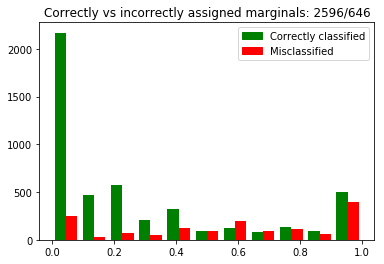

In [44]:
for result_dict_file in l[3:]:
    print "\n\n*******************\n\n"
    with open(result_dict_file, 'rb') as f:
        results_dict = pickle.load(f)
    print 'Loaded %i classifiers:\n'%len(results_dict.keys())
    print results_dict.keys()

    selected_models = results_dict.keys()
    selected_models.sort()

    # Load predicted labels from classifiers


    # convert labels to -1,1....
    for model in selected_models:
        results_dict[model]['label_unlab'] = dict(zip(results_dict[model]['label_unlab_prob+'].keys(),(np.array(results_dict[model]['label_unlab_prob+'].values())>=0.5)*2-1))
        results_dict[model]['label_val'] = dict(zip(results_dict[model]['label_val_prob+'].keys(),(np.array(results_dict[model]['label_val_prob+'].values())>=0.5)*2-1))
        results_dict[model]['label_test'] = dict(zip(results_dict[model]['label_test_prob+'].keys(),(np.array(results_dict[model]['label_test_prob+'].values())>=0.5)*2-1))


    ## Port results into snorkel

    ### Apply labeler / load label matrix from pickle

    #regenerate L_unlab - Takes about 1h for 12 voters (100% coverage)

    L_unlab = labeler.apply(split=3, parallelism=6)

    # load validation & test set & teir labels
    L_gold_dev = load_gold_labels(session, annotator_name='gold', split=1)
    L_dev = labeler.apply_existing(split=1, parallelism=6)

    L_gold_test = load_gold_labels(session, annotator_name='gold', split=2)
    L_test = labeler.apply_existing(split=2, parallelism=6)

    # load unlabeled set labels (for exp3)
    L_gold_unlab = load_gold_labels(session, annotator_name='gold', split=3)

    ### Check some label statistics



    #** Majority voting **
    print "Majority voting"
    error_analysis(L_dev, L_gold_dev, majority_voting=True, save_name=result_dict_file+'MV.png')
    test_scores.loc[result_dict_file, 'MV_P'] , test_scores.loc[result_dict_file, 'MV_R'] , test_scores.loc[result_dict_file, 'MV_F1']  = majority_vote_score(L_dev, L_gold_dev)


    #** Average voting **
    print "Average weighting vote"
    error_analysis(L_dev, L_gold_dev, average_voting=True,  save_name=result_dict_file+'AvgV.png')
    
    
    # Denoising part
    print "Dependency selector"
    ## Find dependencies between LFs
    ds = DependencySelector()

    # Generate all possible dependencies with threshold from 0 to 0.15
    all_deps = [ds.select(L_unlab, threshold=thresh) for thresh in np.array(range(0.1,15.1,2.5))/100.]
    print list(map(lambda x: len(x) ,all_deps))
    all_deps = list(np.unique(all_deps)) # delete duplicates for gridsearch
    print list(map(lambda x: len(x) ,all_deps))

    print "Maximum nr of dependencies: %i" %len(list(combinations(L_dev.col_index.values(),2)))

    # GM training
    print "GM training . . . "


    # without HyperParam search
    gen_model = GenerativeModel()
    gen_model.train(L_unlab)
    test_scores.loc[result_dict_file, 'GM_default_P'], test_scores.loc[result_dict_file, 'GM_default_R'], test_scores.loc[result_dict_file, 'GM_default_F1'] = majority_vote_score(L_test, L_gold_test)
    error_analysis(L_dev, L_gold_dev, gen_model=gen_model,  save_name=result_dict_file+'GM_default.png')
    unlab_marginals_gen_default = gen_model.marginals(L_unlab)

    #** Hyperparameter search **

    param_ranges = { # parameters for the train function of the GenerativeModel
        'step_size' : [10./L_unlab.shape[0],
                      5./L_unlab.shape[0],
                       15./L_unlab.shape[0]
                      ],
        'decay' : [0.99],
        'epochs' : [50],
        'reg_param': [1e-1,1e-2,1e-3],
        'deps': all_deps
    }

    model_class_params = {  # parameters for the GenerativeModel
        'lf_propensity': [True]
    }

    searcher = RandomSearch(GenerativeModel, param_ranges,  L_unlab, model_class_params = model_class_params , n=24 )

    gen_model, run_stats = searcher.fit(L_dev, L_gold_dev, n_threads=6 )
    error_analysis(L_dev, L_gold_dev, gen_model=gen_model,  save_name=result_dict_file+'GM_hyperparam.png')
    test_scores.loc[result_dict_file, 'GM_hyperp_P'], test_scores.loc[result_dict_file, 'GM_hyperp_R'], test_scores.loc[result_dict_file, 'GM_hyperp_F1'] = gen_model.score(L_test, L_gold_test)

    # Save marginals and proceed to LSTM training

    unlab_marginals_gen = gen_model.marginals(L_unlab)
    unlab_marginals_avg = average_vote(L_unlab)
    unlab_marginals_maj = majority_vote(L_unlab)

    
    # Discriminative model learning
    ## Without GS

    train_kwargs = {
        'lr':         0.01,
        'dim':        100,
        'n_epochs':   25,
        'dropout':    0.5,
        'rebalance':  True,
        'print_freq': 1,
        'batch_size': 64
    }
    
    # LSTM + GM (gridsearch)
    print "training LSTM with GM marginals (default params)"
    lstm = reRNN(seed=1701)
    lstm.train(unlab, unlab_marginals_gen_default , X_dev=dev, Y_dev=L_gold_dev, dev_ckpt_delay=0, **train_kwargs)
    
    test_scores.loc[result_dict_file, 'LSTM + GM_def_P'], test_scores.loc[result_dict_file, 'LSTM + GM_def_R'], test_scores.loc[result_dict_file, 'LSTM + GM_def_F1'] = lstm.score(test, L_gold_test)
        
    # LSTM + GM (gridsearch)
    print "training LSTM with GM marginals (gridsearch)"
    lstm = reRNN(seed=1701)
    lstm.train(unlab, unlab_marginals_gen , X_dev=dev, Y_dev=L_gold_dev, dev_ckpt_delay=0, **train_kwargs)

    test_scores.loc[result_dict_file, 'LSTM + GM_P'], test_scores.loc[result_dict_file, 'LSTM + GM_R'], test_scores.loc[result_dict_file, 'LSTM + GM_F1'] = lstm.score(test, L_gold_test)

    #** with averaging marginals **
    print "training LSTM with avg marginals"
    lstm = reRNN(seed=1701)
    lstm.train(unlab, unlab_marginals_avg , X_dev=dev, Y_dev=L_gold_dev,  dev_ckpt_delay=0, **train_kwargs)

    test_scores.loc[result_dict_file, 'LSTM + AvgV_P'], test_scores.loc[result_dict_file, 'LSTM + AvgV_R'], test_scores.loc[result_dict_file, 'LSTM + AvgV F1'] = lstm.score(test, L_gold_test)

    lstm = reRNN(seed=1701)
    print "training LSTM with majority vote marginals"
    lstm.train(unlab, unlab_marginals_maj , X_dev=dev, Y_dev=L_gold_dev, dev_ckpt_delay=0, **train_kwargs)

    test_scores.loc[result_dict_file, 'LSTM + MV_P'], test_scores.loc[result_dict_file, 'LSTM + MV_R'], test_scores.loc[result_dict_file, 'LSTM + MV_F1'] = lstm.score(test, L_gold_test)
    print test_scores

In [45]:
test_scores

,n_classif,MV_P,MV_R,MV_F1,GM_default_P,GM_default_R,GM_default_F1,GM_hyperp_P,GM_hyperp_R,GM_hyperp_F1,...,LSTM + GM_def_F1,LSTM + GM_P,LSTM + GM_R,LSTM + GM_F1,LSTM + AvgV_P,LSTM + AvgV_R,LSTM + AvgV F1,LSTM + MV_P,LSTM + MV_R,LSTM + MV_F1
pickles/_exp3/base_learner_predictions/KMeansPeaks/10clusters.pickle,10clusters.pickle,0.583234,0.685915,0.630421,0.583815,0.661794,0.620364,0.565827,0.691028,0.622192,...,0.512854,0.478049,0.592742,0.529253,0.514073,0.626008,0.564545,0.484144,0.577117,0.526558
pickles/_exp3/base_learner_predictions/KMeansPeaks/13clusters.pickle,13clusters.pickle,0.566779,0.711268,0.630856,0.562869,0.672379,0.612770,0.597618,0.581653,0.589527,...,0.526536,0.477567,0.557964,0.514644,0.513587,0.666835,0.580263,0.502153,0.587702,0.541570
pickles/_exp3/base_learner_predictions/KMeansPeaks/15clusters.pickle,15clusters.pickle,0.574566,0.700000,0.631111,0.571738,0.664819,0.614775,0.563526,0.657258,0.606794,...,0.534042,0.468381,0.559980,0.510101,0.517751,0.617440,0.563218,0.430104,0.626512,0.510053
pickles/_exp3/base_learner_predictions/KMeansPeaks/20clusters.pickle,20clusters.pickle,0.579374,0.704225,0.635728,0.573529,0.668347,0.617318,0.573207,0.672883,0.619059,...,0.524316,0.506210,0.595766,0.547349,0.536837,0.576613,0.556015,0.469523,0.535786,0.500471
pickles/_exp3/base_learner_predictions/KMeansPeaks/21clusters.pickle,21clusters.pickle,0.575758,0.695775,0.630102,0.574653,0.667339,0.617537,0.599074,0.652218,0.624517,...,0.519321,0.476708,0.618952,0.538596,0.526408,0.607863,0.564211,0.451526,0.589214,0.511262
pickles/_exp3/base_learner_predictions/KMeansPeaks/5clusters.pickle,5clusters.pickle,0.537123,0.652113,0.589059,0.562633,0.667843,0.610740,0.562633,0.667843,0.610740,...,0.524038,0.442342,0.624496,0.517868,0.501098,0.575101,0.535555,0.444575,0.574093,0.501100


In [35]:
result_dict_file

'pickles/_exp3/base_learner_predictions/KMeansPeaks/20clusters.pickle'

In [46]:
test_scores.to_csv(path_base_learners+'/KMeansPeaks/test_scores.csv')

In [ ]:
list(map(lambda x: x.split('/')[-1] , test_scores.index))

In [ ]:
test_scores[['n_classif','MV_F1',]]

In [56]:
import seaborn as sns

In [61]:
test_scores[test_scores.columns[list(map(lambda x: "F1" in x or "F1" in x, test_scores.columns))]]

,MV_F1,GM_default_F1,GM_hyperp_F1,LSTM + GM_def_F1,LSTM + GM_F1,LSTM + AvgV F1,LSTM + MV_F1
pickles/_exp3/base_learner_predictions/KMeansPeaks/10clusters.pickle,0.630421,0.620364,0.622192,0.512854,0.529253,0.564545,0.526558
pickles/_exp3/base_learner_predictions/KMeansPeaks/13clusters.pickle,0.630856,0.612770,0.589527,0.526536,0.514644,0.580263,0.541570
pickles/_exp3/base_learner_predictions/KMeansPeaks/15clusters.pickle,0.631111,0.614775,0.606794,0.534042,0.510101,0.563218,0.510053
pickles/_exp3/base_learner_predictions/KMeansPeaks/20clusters.pickle,0.635728,0.617318,0.619059,0.524316,0.547349,0.556015,0.500471
pickles/_exp3/base_learner_predictions/KMeansPeaks/21clusters.pickle,0.630102,0.617537,0.624517,0.519321,0.538596,0.564211,0.511262
pickles/_exp3/base_learner_predictions/KMeansPeaks/5clusters.pickle,0.589059,0.610740,0.610740,0.524038,0.517868,0.535555,0.501100


In [ ]:
# TODO: calculate mean F1 score f.each cluster
f1s = []
# for key in 

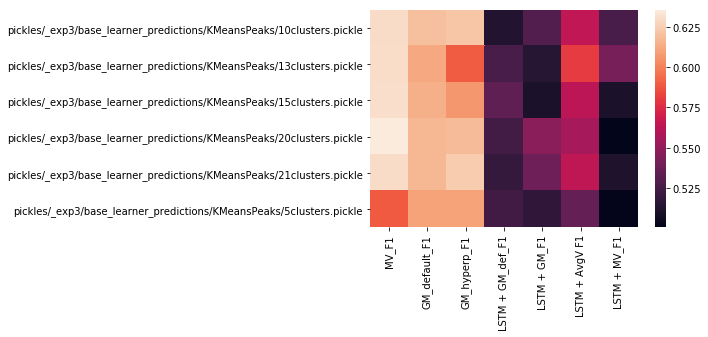

In [60]:
sns.heatmap(test_scores[test_scores.columns[list(map(lambda x: "F1" in x or "F1" in x, test_scores.columns))]])

#TODO: 16, 32, 40 ??

## With GS

In [89]:
# from MLutils import balance_candidates

In [90]:
# from snorkel.annotations import load_marginals
# train_labels = np.array([0 if train[x].gold_labels[0].value ==-1 else 1 for x in range(len(train))]) # load train labels to mix in LSTM
# unlab_marginals = load_marginals(session, split=3)


In [91]:
# #manually balance candidates
# train_us, train_labels_us = balance_candidates(train,train_labels)
# unlab_us, unlab_marginals_us = balance_candidates(unlab,unlab_marginals)

In [92]:
# train_unlab_marginals = np.append(train_labels_us, unlab_marginals_us)

In [93]:
# plt.hist(train_unlab_marginals, bins=20)
# plt.title('Histogram of marginals (candidates undersampled before GM) + GS ')
# plt.show()

In [94]:
# train_kwargs = {
#     'lr':         0.01,
#     'dim':        100,
#     'n_epochs':   25,
#     'dropout':    0.5,
#     'rebalance':  False,
#     'print_freq': 1,
#     'batch_size': 64
# }

# lstm = reRNN(seed=1701, n_threads=6)
# lstm.train(train_us+unlab_us, train_unlab_marginals, X_dev=dev, Y_dev=L_gold_dev, dev_ckpt_delay=0, **train_kwargs)


In [95]:
# %%capture cap --no-stderr
# tp, fp, tn, fn = lstm.error_analysis(session, dev, L_gold_dev, batch_size = 1024)

In [96]:
# %%capture cap --no-stderr
# with open(result_dict_file+".txt", "a") as f:
#     f.write(unicode("LSTM + GM (val set) trained on GS+US:\n"))
#     f.write(cap.stdout)
#     f.write(unicode('\n\n'))

In [97]:
# %%capture cap --no-stderr
# tp, fp, tn, fn = lstm.error_analysis(session, test, L_gold_test, batch_size = 1024)

In [98]:
# with open(result_dict_file+".txt", "a") as f:
#     f.write(unicode("LSTM + GM (test set) trained on GS+US:\n"))
#     f.write(cap.stdout)
#     f.write(unicode('\n\n'))

In [99]:
# test_scores.loc[result_dict_file, 'LSTM + GM (GS+US)'] = lstm.score(test, L_gold_test)[-1]

### Save scores

In [86]:
with open(result_dict_file+".txt", "a") as f:
    f.write(unicode(test_scores.to_latex()))
    f.write(unicode('\n\n'))
    

AttributeError: 'newlist' object has no attribute 'to_latex'